In [1]:
import numpy as np
import scipy.optimize as op
import scipy.stats as ss
import matplotlib.pyplot as plt
import ARTsampler
import emcee
import corner

%matplotlib inline
np.random.seed(42)

In [2]:
# a posterior
_variances = np.array([0.1, 2.])**2
_corr = 0.3
_Sigma = np.diag(_variances)
_Sigma[0,1] = _Sigma[1,0] = _corr*np.sqrt(np.prod(_Sigma.diag()))
_w = 0.9
_F1 = ss.multivariate_normal(mean=np.array([0.1, 4]), cov=_Sigma)
_F2 = ss.multivariate_normal(mean=np.array([0.4, 4]), cov=_Sigma)
print(_Sigma)

def lnpost(x):
    return np.log(_w*_F1.pdf(x) + (1-_w)*_F2.pdf(x)) + 10 #plus a DC offset for testing
        
def neg_lnpost(x):
    return -lnpost(x)

[[0.01 0.  ]
 [0.   4.  ]]


In [3]:
sampler = ARTsampler.ARTsampler(lnpost, lnprob_args=(), x0=[0,0], 
                                temperature=20, multiplicity = 30,
                                quiet=False, verbose=True)

Running the minimizer
      fun: -9.667440818287814
 hess_inv: array([[ 9.92888900e-03, -1.56488310e-03],
       [-1.56488310e-03,  3.98665217e+00]])
      jac: array([2.02655792e-06, 1.19209290e-07])
  message: 'Optimization terminated successfully.'
     nfev: 48
      nit: 9
     njev: 12
   status: 0
  success: True
        x: array([0.10037402, 4.00000017])
Optimizing G on update 1
Best A = 9.91 mean = [0.1016733  3.99771148]
      fun: 14432.216545514608
 hess_inv: array([[4.0550376e-05]])
      jac: array([-0.00772431])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 73
      nit: 8
     njev: 61
   status: 2
  success: False
        x: array([0.72512728])


In [4]:
pos = np.array([0.3, 3]) + 1e-2 * np.random.randn(32, 2)
nwalkers, ndim = pos.shape

Esampler = emcee.EnsembleSampler(nwalkers, ndim, sampler.logpdf)
Esampler.run_mcmc(pos, 6000)
samples = Esampler.get_chain(flat=True)

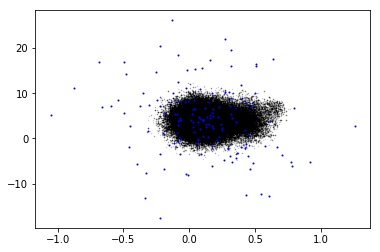

In [5]:
plt.scatter(samples[:,0], samples[:,1], c='k', alpha=0.2, s=0.2)
plt.scatter(sampler.g[:,0], sampler.g[:,1], c="blue", s=1)

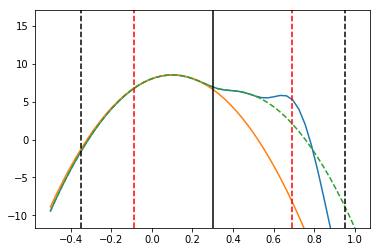

In [10]:
xs = np.linspace(-.5, 1)
xs = np.vstack((xs,xs)).T
xs[:,1] = 7
lnG = sampler.Gaussian_component_logpdf(xs)
lnp = sampler.logpdf(xs)
TRUTH = np.array([lnpost(xi) for xi in xs])
plt.plot(xs[:,0], lnp)
plt.plot(xs[:,0], lnG)
plt.plot(xs[:,0], TRUTH, "--")
plt.ylim(min(TRUTH), max(TRUTH)*2)
plt.axvline(0.3, c='k')
plt.axvline(0.3 + 5*0.13, c="k", ls="--")
plt.axvline(0.3 - 5*0.13, c="k", ls="--")
plt.axvline(0.3 + 3*0.13, c="r", ls="--")
plt.axvline(0.3 - 3*0.13, c="r", ls="--")

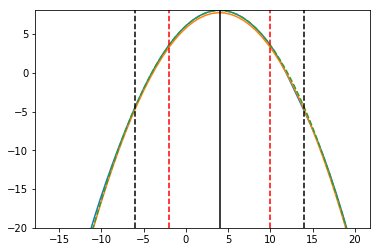

In [7]:
xs = np.linspace(-16, 20)
xs = np.vstack((xs,xs)).T
xs[:,0] = 0.3
lnG = sampler.Gaussian_component_logpdf(xs)
lnp = sampler.logpdf(xs)
TRUTH = np.array([lnpost(xi) for xi in xs])
plt.plot(xs[:,1], lnp)
plt.plot(xs[:,1], lnG)
plt.plot(xs[:,1], TRUTH, "--")
plt.ylim(-20, max(TRUTH))
plt.axvline(4, c='k')
plt.axvline(4 + 5*2, c="k", ls="--")
plt.axvline(4 - 5*2, c="k", ls="--")
plt.axvline(4 + 3*2, c="r", ls="--")
plt.axvline(4 - 3*2, c="r", ls="--")

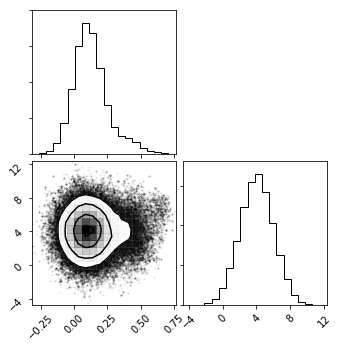

In [8]:
fig = corner.corner(samples)

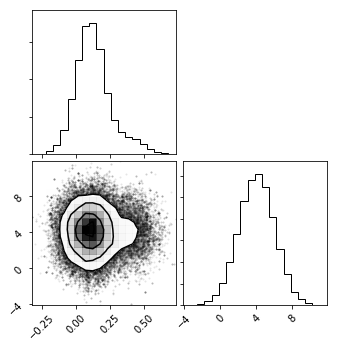

In [9]:
if True:
    Esampler2 = emcee.EnsembleSampler(nwalkers, ndim, lnpost)
    Esampler2.run_mcmc(pos, 3000)
    samples = Esampler2.get_chain(flat=True)
    fig = corner.corner(samples)